In [1]:
import os

In [2]:
# If in Colab and not yet downloaded, download GitHub repository
if os.getcwd() == '/content': 
    if not os.path.exists('/content/Cascade'):
        !git clone https://github.com/HelmchenLabSoftware/Cascade
    os.chdir('Cascade')
    
# If executed as jupyter notebook on own computer, change to parent directory for imports
if os.path.basename( os.getcwd() ) == 'Demo scripts':
    %cd ..
    print('New working directory:', os.getcwd() )

# set environment variables depending on colab or jupyter environment
if os.getcwd() == '/content/Cascade':
    ENV = 'colab'
else: # assume jupyter
    ENV = 'jupyter'
    %matplotlib notebook

In [3]:
# Imports:
import matplotlib.pyplot as plt
import numpy as np

from cascade2p import utils
import ipywidgets as widgets

## Load datasets
datasets = utils.load_all_ground_truth( ground_truth_folder='Ground_truth')
dataset_names = sorted(list( datasets.keys() ))

plt.style.use('seaborn')

print('\nSuccessfully loaded ground truth data.')


Successfully loaded ground truth data.


/tmp/ipykernel_8197/611059841.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
#@markdown Click the play button on the left to initialize the interactive exploration. Use the dropdown menu (`Dataset`) to select a dataset und use the slider (`Recording`) to switch between different continuous recordings. For some datasets, several recordings exist for the same neuron.

#@markdown Use the other two sliders to zoom into the plot (`Zoom`) and to move along the time axis (`Offset`).

#@markdown If you run this in a Jupyter notebook, you can use the magnifying glass button to draw rectangles with the left mouse button to zoom in, and the right mouse button to zoom out.

def plot_neuron(Dataset, Recording, Zoom=1, Offset=0):
    """Plot the fluorescence and spikes for a single recording of the dataset
    
    Parameters
    -------
    Dataset: str
        Name of the dataset, which is identical to the folder name in the Ground_truth folder
    Recording: int
        Number of the recording in this dataset, pooled across all files in this dataset
    """

    # correct for different plot sizes in colab and jupyter
    if ENV=='colab':   plt.figure(figsize=(20,8))
    if ENV=='jupyter': plt.figure(figsize=(8,5))
    
    
    data = datasets[Dataset][Recording]
    # plt.cla()
    plt.plot( data['t'][4:], data['dff'][4:], lw=0.5)
    
    max_dff = np.max( data['dff'][4:])
    min_dff = np.min( data['dff'][4:])
    
    plt.eventplot( data['spikes'], lineoffsets=min_dff - max_dff/20,
                  linelengths=max_dff/20, color='k', lw=1.5)
    
    # TODO: add number of APs if they are very close to each other or firing rate
    
    plt.xlabel('Time [s]')
    plt.ylabel('Relative Fluorescence Change [Df/f]')
    plt.title('Dataset: {}   Recording: {}   Frame rate: {:.1f} Hz'.format(Dataset, Recording, data['frame_rate']))
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Adjust zoom and offset
    if (Zoom != 1) or (Offset != 0):
        t_min = Offset
        t_max = (data['t'][-1] / Zoom) + Offset
        plt.xlim( (t_min, t_max) )
    
dataset_widget = widgets.Dropdown(options=dataset_names, value =dataset_names[9] )
recording_widget = widgets.IntSlider(min=0, max=100, step=1, value=0, continuous_update=False)

# update number of recordings depending on dataset
def update_nr_recordings(*args):
    recording_widget.max = len( datasets[dataset_widget.value] ) - 1
    
dataset_widget.observe( update_nr_recordings, 'value')
    
widgets.interact(plot_neuron, Dataset=dataset_widget,
                            Recording=recording_widget,
                            Zoom=widgets.IntSlider(min=1, max=50, step=1, value=1, continuous_update=False),
                            Offset=widgets.IntSlider(min=0, max=100, step=1, value=0, continuous_update=False)            
                )

# update manually the first time:
update_nr_recordings()

interactive(children=(Dropdown(description='Dataset', index=9, options=('DS01-OGB1-m-V1', 'DS02-OGB1-2-m-V1', …

In [5]:
dataset_names

['DS01-OGB1-m-V1',
 'DS02-OGB1-2-m-V1',
 'DS03-Cal520-m-S1',
 'DS04-OGB1-zf-pDp',
 'DS05-Cal520-zf-pDp',
 'DS06-GCaMP6f-zf-aDp',
 'DS07-GCaMP6f-zf-dD',
 'DS08-GCaMP6f-zf-OB',
 'DS09-GCaMP6f-m-V1',
 'DS10-GCaMP6f-m-V1-neuropil-corrected',
 'DS11-GCaMP6f-m-V1-neuropil-corrected',
 'DS12-GCaMP6s-m-V1-neuropil-corrected',
 'DS13-GCaMP6s-m-V1-neuropil-corrected',
 'DS14-GCaMP6s-m-V1',
 'DS15-GCaMP6s-m-V1',
 'DS16-GCaMP6s-m-V1',
 'DS17-GCaMP5k-m-V1',
 'DS18-R-CaMP-m-CA3',
 'DS19-R-CaMP-m-S1',
 'DS20-jRCaMP1a-m-V1',
 'DS21-jGECO1a-m-V1',
 'DS22-OGB1-m-SST-V1',
 'DS23-OGB1-m-PV-V1',
 'DS24-GCaMP6f-m-PV-V1',
 'DS25-GCaMP6f-m-SST-V1',
 'DS26-GCaMP6f-m-VIP-V1',
 'DS27-GCaMP6f-m-PV-vivo-V1',
 'X-DS00-OGB1-m-S1',
 'X-DS09-GCaMP6f-m-V1',
 'X-DS10-GCaMP6f-m-V1',
 'X-DS11-GCaMP6s-m-V1',
 'X-DS12-GCaMP6s-m-V1',
 'X-NAOMi-GCaMP6f-simulated']

In [6]:
data_test = datasets['DS10-GCaMP6f-m-V1-neuropil-corrected'][20]
data_test

{'dff': array([ 0.86675094,  0.83451585,  0.8205647 , ..., -0.0200391 ,
         0.07806701,  0.24788889]),
 't': array([6.31790000e-03, 1.26358000e-02, 1.89537000e-02, ...,
        1.26345364e+02, 1.26351682e+02, 1.26358000e+02]),
 'spikes': array([  2.11002621,   2.12666823,   7.08781741,  10.80919857,
         12.48243493,  12.52042378,  12.56466904,  12.58141116,
         14.11130091,  15.14573391,  15.16678043,  15.86922388,
         19.91753943,  26.9935016 ,  31.00322768,  41.3196041 ,
         41.44353085,  42.96964173,  43.22347635,  43.33634178,
         43.36174276,  47.35249944,  49.50722826,  49.87049981,
         50.11329814,  50.27821681,  50.44198431,  51.00721242,
         52.05190591,  52.08291263,  52.2791133 ,  52.28839779,
         54.10705789,  54.85895191,  55.96463278,  56.11010657,
         59.48736077,  59.9830928 ,  62.27203389,  63.48805261,
         63.725045  ,  63.75332393,  66.51770128,  66.86405553,
         68.48213547,  68.67270539,  68.68486782,  71.

In [8]:
len(data_test)

4

In [9]:
rec = 0
data = datasets['DS10-GCaMP6f-m-V1-neuropil-corrected'][rec]
dff = data['dff']
times = data['t']
spikes = data['spikes']
%matplotlib inline
#plt.figure(figsize=(20, 5))
#plt.plot(dff)
#diffs = np.diff(dff)
#plt.hist(diffs)


In [20]:
len(times)
35000/127

275.59055118110234

(array([1.00e+00, 1.00e+00, 1.00e+00, 3.26e+04, 6.42e+02, 6.43e+02,
        6.43e+02, 0.00e+00, 0.00e+00, 4.68e+02]),
 array([0.0063179, 0.0063179, 0.0063179, 0.0063179, 0.0063179, 0.0063179,
        0.0063179, 0.0063179, 0.0063179, 0.0063179, 0.0063179]),
 <BarContainer object of 10 artists>)

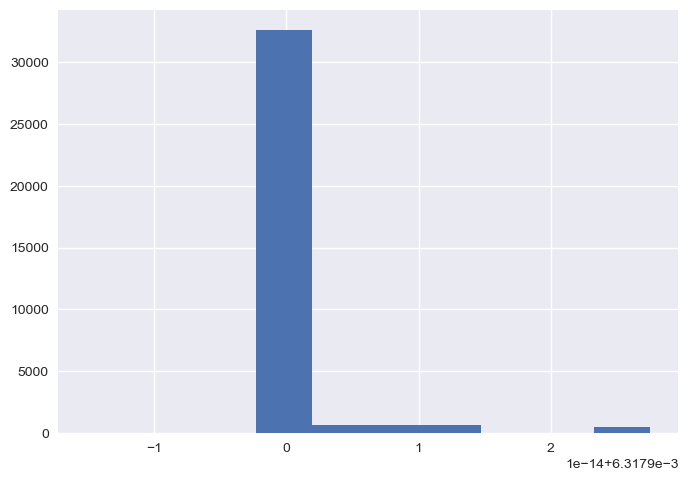

In [14]:
diffs = np.diff(times)
plt.hist(diffs)

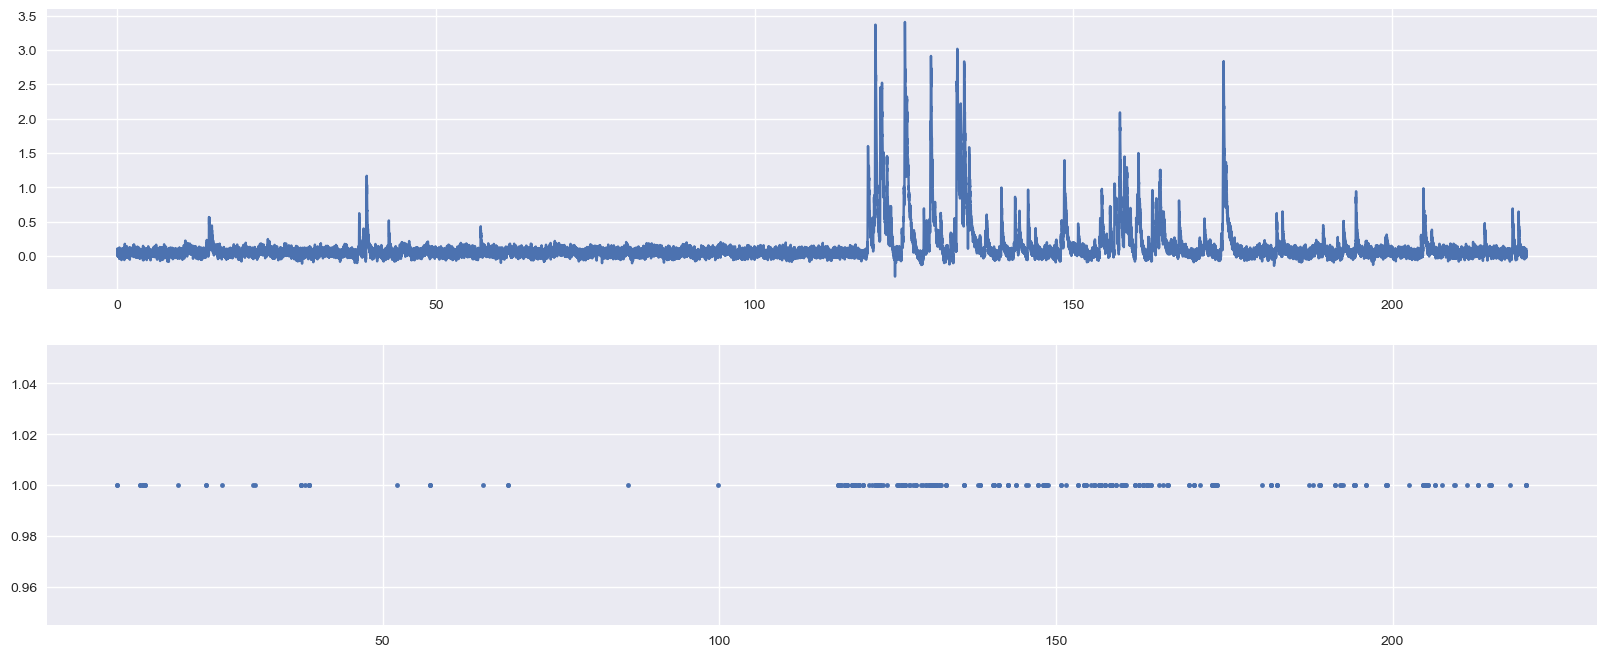

In [15]:
sp_one = np.ones(np.size(spikes))
f = plt.figure(figsize=(20,8))
ax1 , ax2 = f.subplots(2)

ax1.plot(times, dff)
ax2.plot(spikes, sp_one, '.')


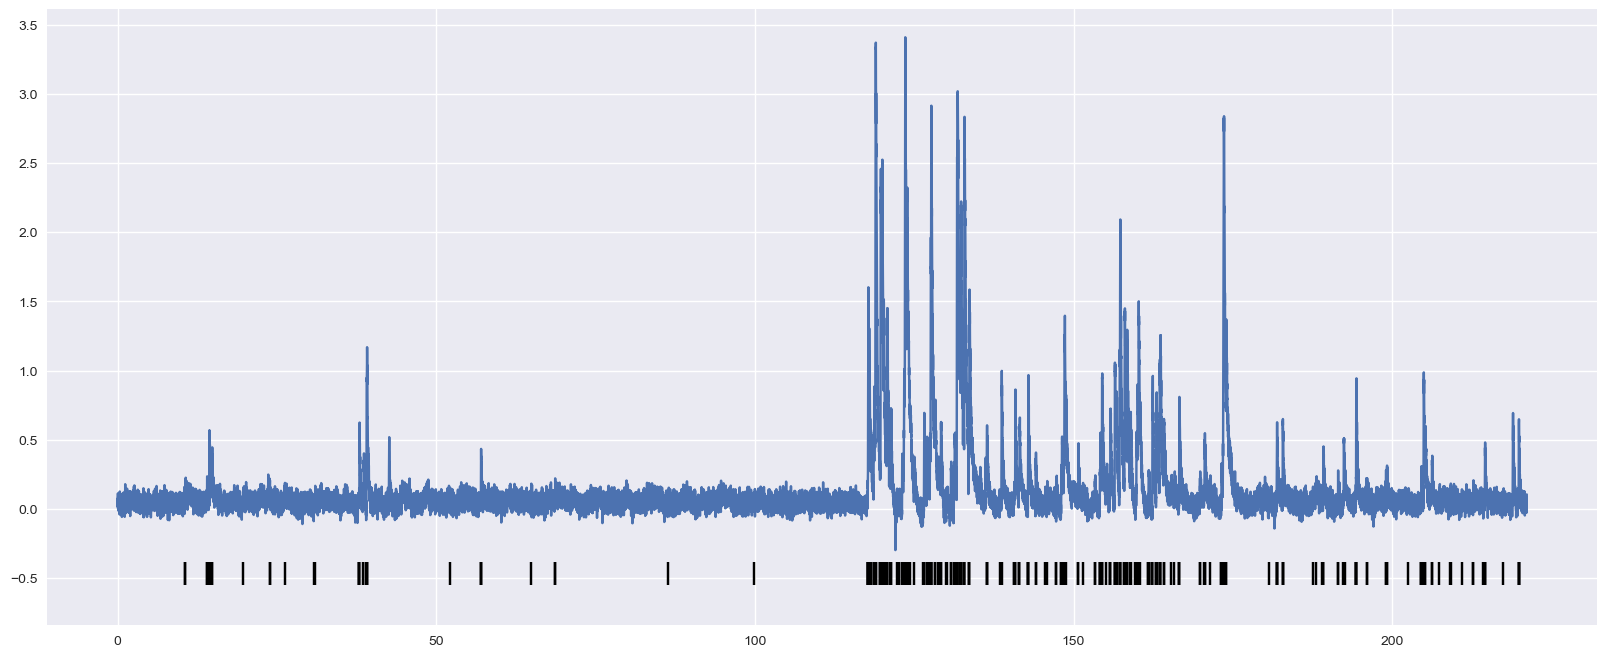

In [16]:
max_dff = np.max( dff[4:])
min_dff = np.min( dff[4:])
plt.figure(figsize=(20, 8))
plt.eventplot(spikes, lineoffsets=min_dff - max_dff/20, linelengths=max_dff/20, color='k')
plt.plot(times, dff)

In [17]:
np.save('test_dff_1.npy', dff)
np.save('test_spikes_1.npy', spikes)

In [18]:
print(data)

{'dff': array([0.03578354, 0.0545103 , 0.07432933, ..., 0.04333311, 0.08348518,
       0.1055932 ]), 't': array([6.31790000e-03, 1.26358000e-02, 1.89537000e-02, ...,
       2.21113864e+02, 2.21120182e+02, 2.21126500e+02]), 'spikes': array([ 10.6058559 ,  10.61853849,  14.01657171,  14.02295052,
        14.37033338,  14.37551148,  14.38046444,  14.55121661,
        14.78878376,  14.79263606,  19.67683352,  23.83282026,
        23.83934916,  26.20839168,  30.81204628,  30.9915787 ,
        37.89175742,  37.92024947,  37.93493326,  37.93988622,
        38.52388566,  39.04081996,  39.0467235 ,  39.05505348,
        39.06098203,  39.10893572,  52.10423646,  56.99909029,
        57.00459359,  57.01587534,  64.87232624,  68.64350773,
        68.65166261,  86.40846239,  99.79887454, 117.68542696,
       117.6948576 , 117.73795839, 117.74518771, 117.76224792,
       117.76797635, 117.77748204, 117.91066173, 117.91591487,
       118.19855899, 118.6234132 , 118.62734055, 118.73523011,
       118.

In [14]:
calcium = data['dff']
np.shape(calcium)

(35000,)

In [15]:
ts = data['t']
print(ts)

[6.31790000e-03 1.26358000e-02 1.89537000e-02 ... 2.21113864e+02
 2.21120182e+02 2.21126500e+02]


In [16]:
np.shape(ts)

(35000,)

In [17]:
np.set_printoptions(threshold=100)

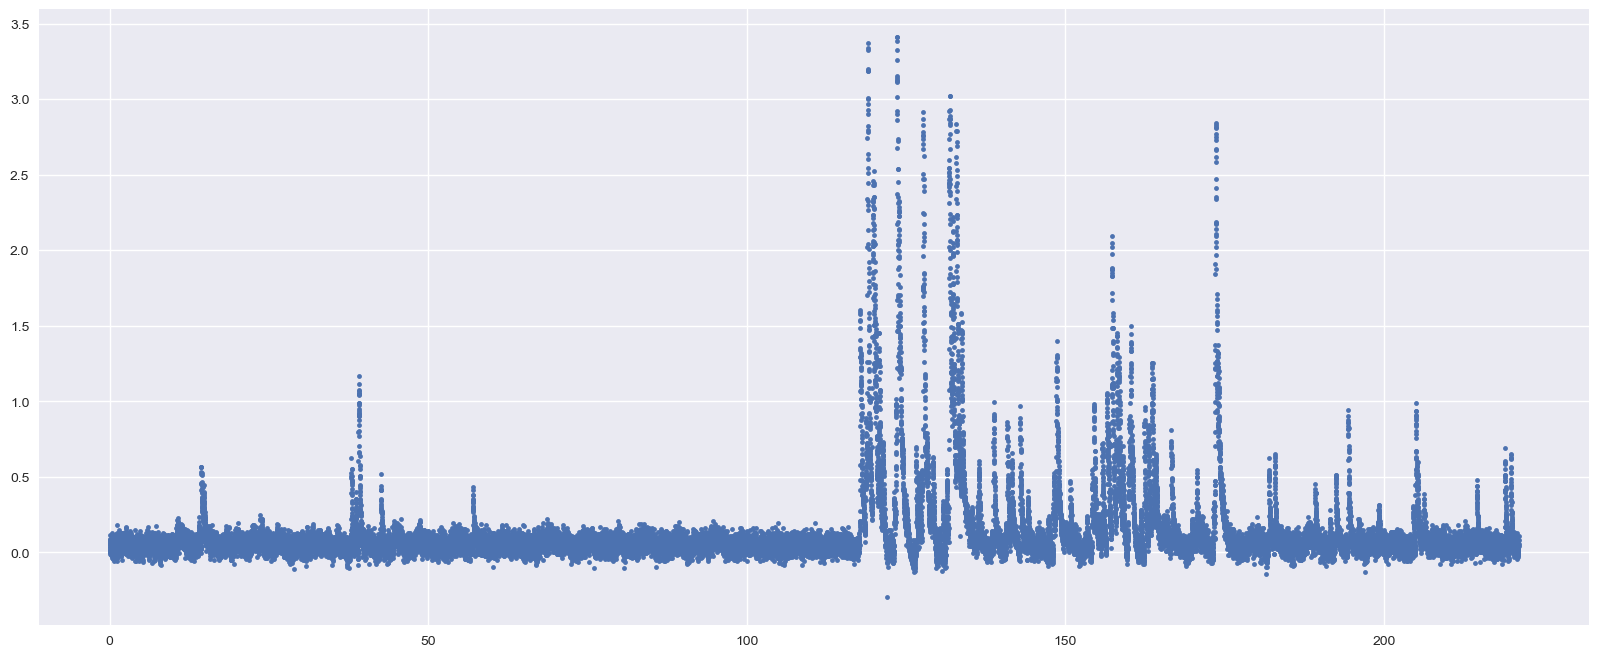

In [18]:
plt.figure(figsize=(20, 8))
#plt.eventplot(spikes, lineoffsets=min_dff - max_dff/20, linelengths=max_dff/20, color='k')
plt.plot(times, dff, '.')

### Up-sampling

In [34]:
from scipy.interpolate import interp1d

In [35]:
intpld_signal_func = interp1d(times, dff, kind='cubic')

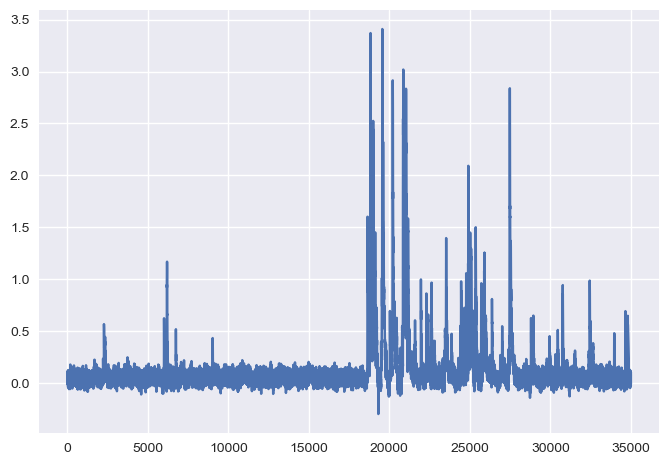

In [36]:
plt.plot(intpld_signal_func(times))

In [37]:
#upsampling_rate = data['frame_rate']
upsampling_rate = 1000
evenly_spaced_time = np.linspace(times[0], times[-1], int((times[-1]-times[0])*upsampling_rate))

In [38]:
upsampled_signal = intpld_signal_func(evenly_spaced_time)

In [39]:
np.shape(upsampled_signal)

(221120,)

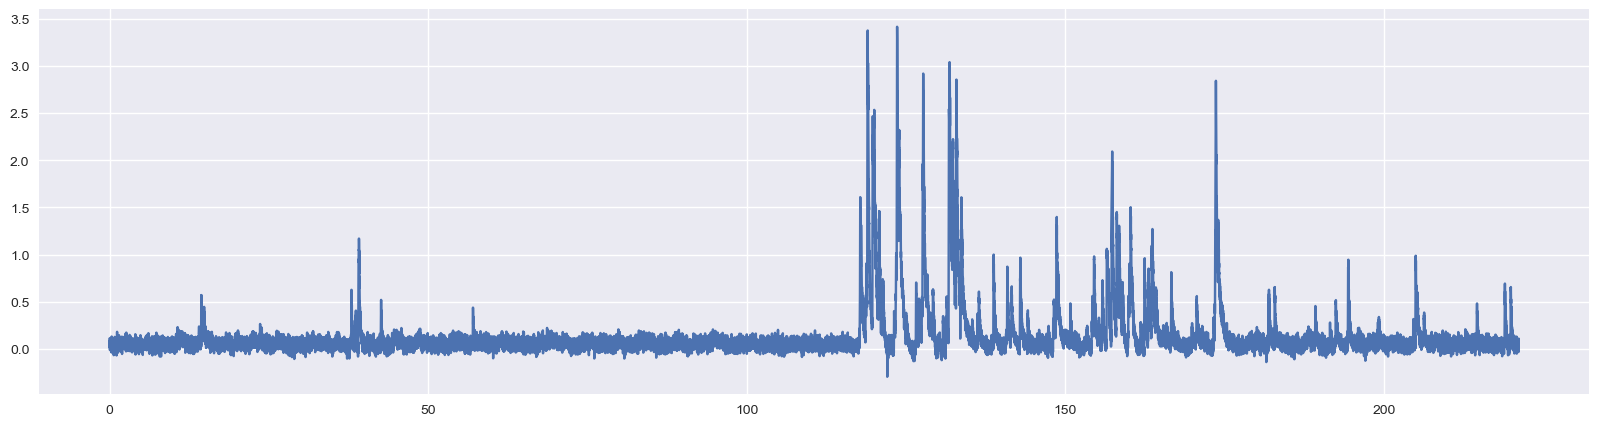

In [40]:
plt.figure(figsize=(20, 5))
plt.plot(evenly_spaced_time, upsampled_signal)

In [41]:
len(upsampled_signal)

221120

In [25]:
evenly_spaced_time

array([6.31790000e-03, 7.31790535e-03, 8.31791069e-03, ...,
       2.21124500e+02, 2.21125500e+02, 2.21126500e+02])

In [31]:
times

array([8.61549065e-02, 1.72309813e-01, 2.58464720e-01, ...,
       5.92573447e+02, 5.92659602e+02, 5.92745757e+02])

In [27]:
np.shape(evenly_spaced_time)

(221120,)

Kernel estimation

In [31]:
from kernel_est_funcs import *

In [42]:
signal , deriv = smoothed_signals(upsampled_signal, 51)

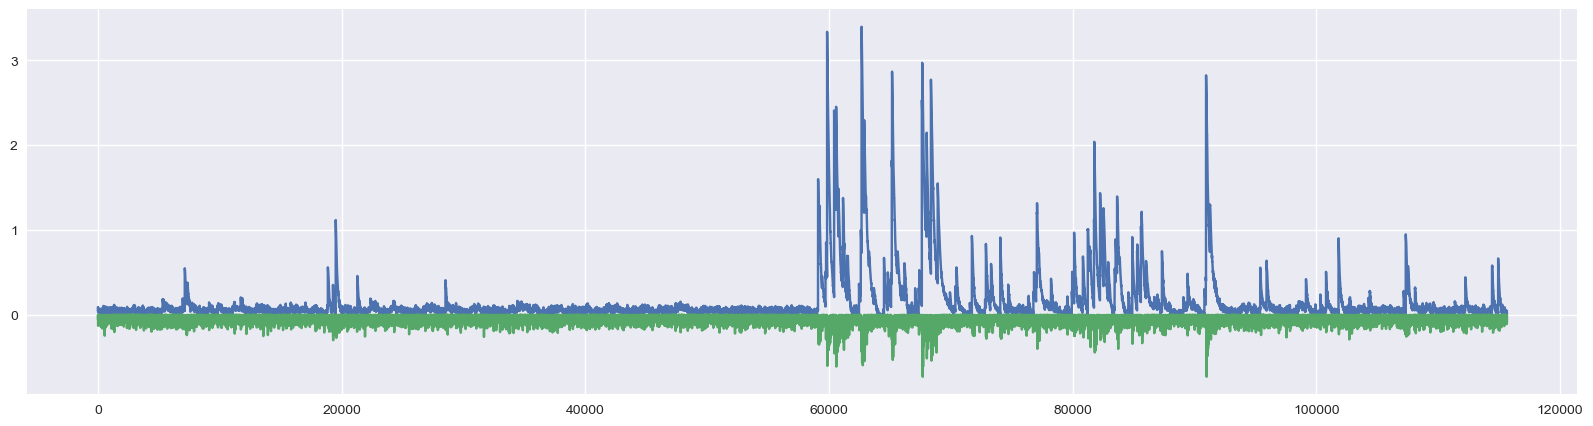

In [45]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(signal)
ax.plot(30*deriv)

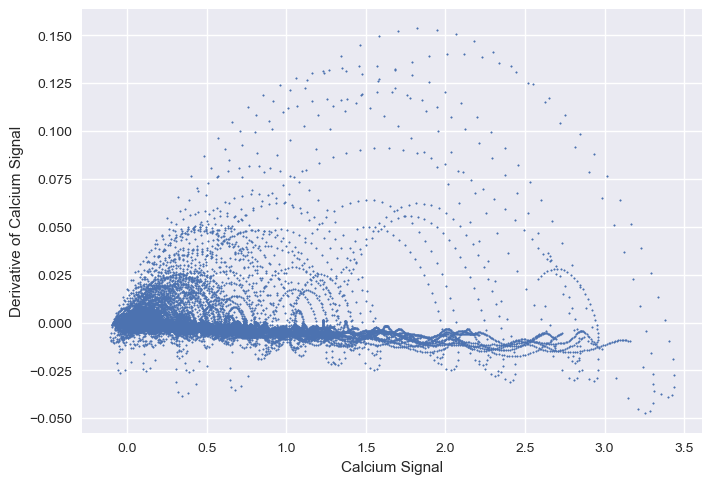

In [47]:
scatter_all(signal, 51)

-0.0031363843062731196

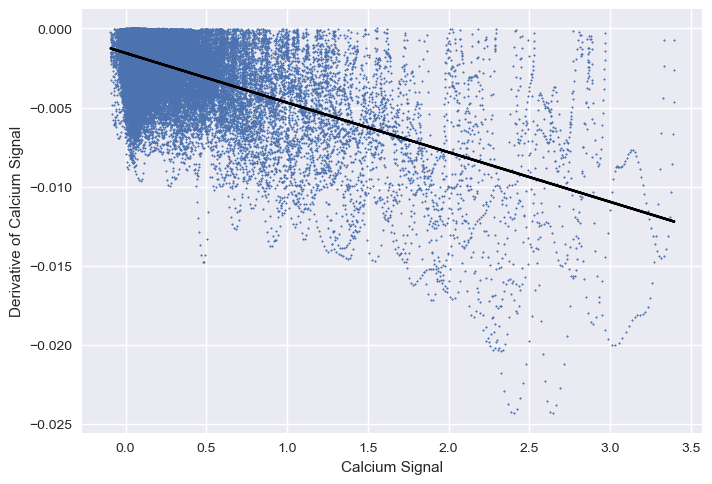

In [48]:
pure_fit(signal, deriv, True)

In [49]:
1000

0.0031

### PSD

In [17]:
from scipy import signal as sig

In [18]:
(f, s) = sig.periodogram(dff, 12, scaling='density')

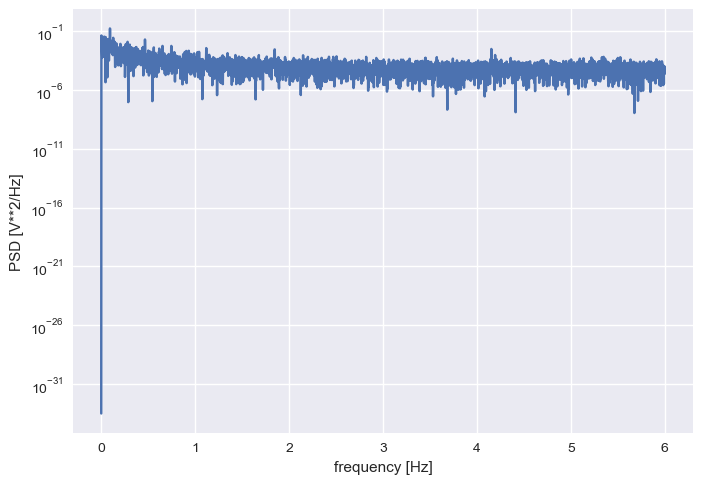

In [20]:
plt.semilogy(f, s)
#plt.ylim([1e-7, 1e2])
#plt.xlim([0,100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


### Kernel fitting

In [28]:
from scipy.optimize import curve_fit

def func(t, A, tau):
    return A * np.exp(-t/tau)

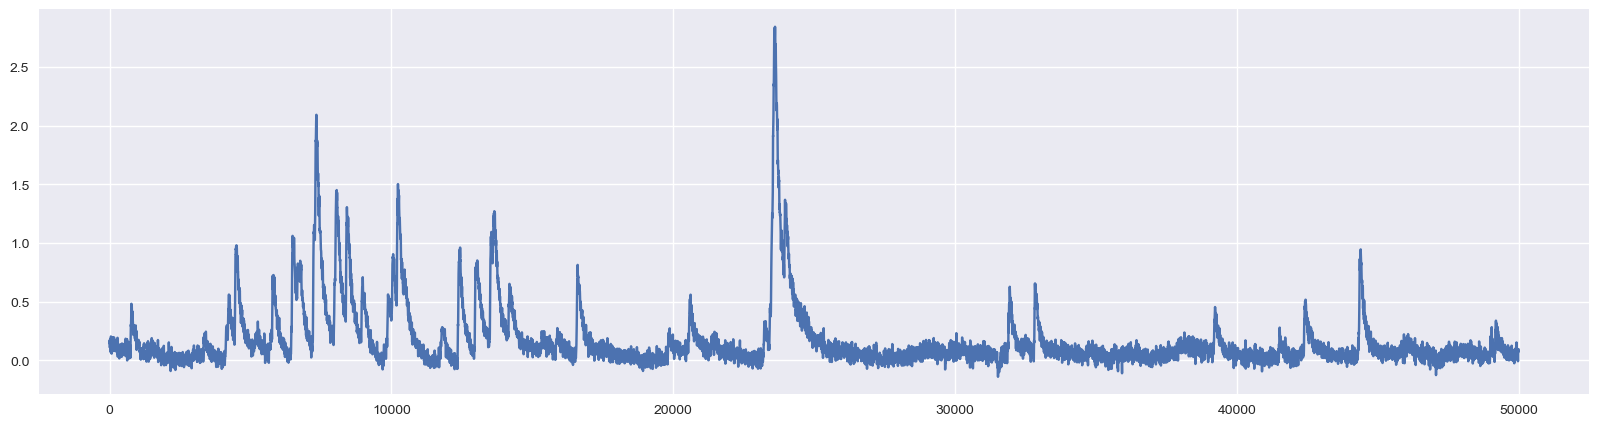

In [29]:
sig1 = upsampled_signal[150000:200000]
time1 = evenly_spaced_time[150000:200000]
plt.figure(figsize=(20, 5))
plt.plot(sig1)

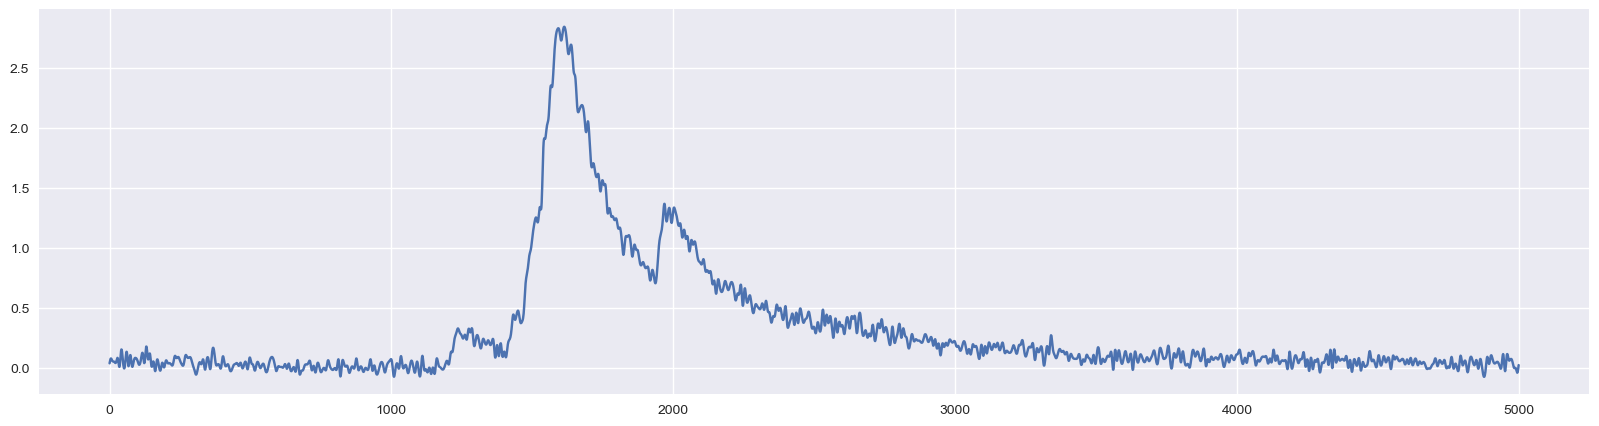

In [30]:
sig11 = sig1[22000:27000]
time11 = time1[22000:27000]
plt.figure(figsize=(20, 5))
plt.plot(sig11)

[69]
[113]
[437]


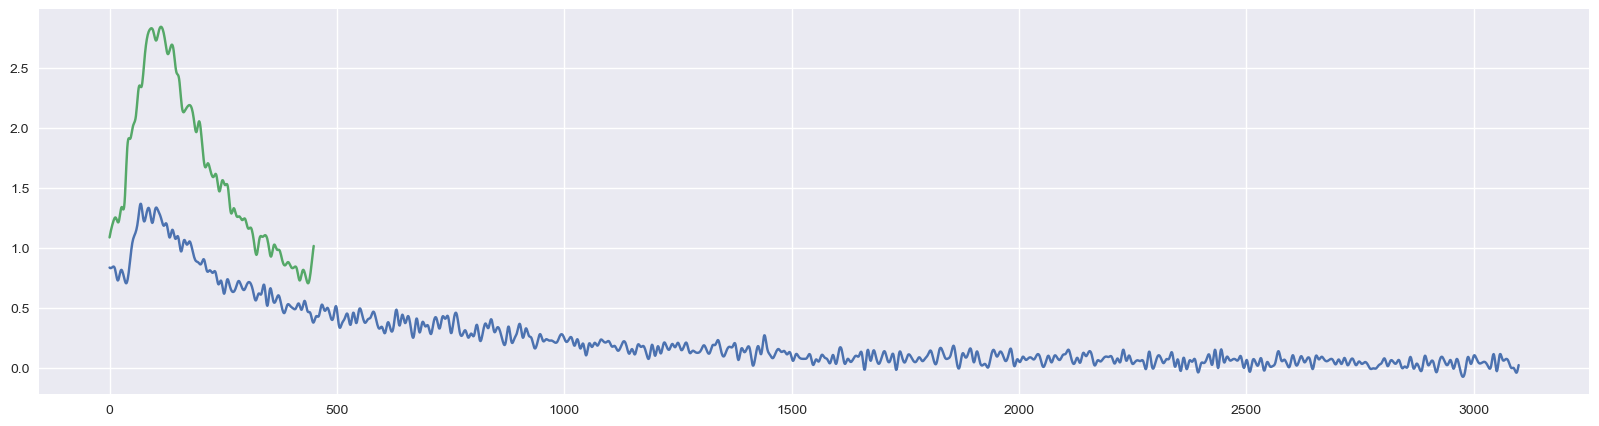

In [31]:
sig2 = sig11[1900:]
sig3 = sig11[1500:1950]
time2 = time11[1900:]
time3 = time11[1500:1950]
plt.figure(figsize=(20, 5))
plt.plot(sig2)
plt.plot(sig3)

print(np.where(sig2 == np.max(sig2))[0])
print(np.where(sig3 == np.max(sig3))[0])
print(np.where(sig3 == np.min(sig3))[0])

In [32]:
signal1 = sig2[69:]
signal2 = sig3[113:437]
t1 = time2[69:]
t2 = time3[113:437]

In [33]:
t1

array([173.97624794, 173.97724794, 173.97824795, ..., 177.00426412,
       177.00526413, 177.00626413])

In [34]:
len(t1)

3031

In [35]:
t1 = t1 - t1[0]
t1

array([0.00000000e+00, 1.00000535e-03, 2.00001069e-03, ...,
       3.02801619e+00, 3.02901619e+00, 3.03001620e+00])

In [36]:
t2 = t2 - t2[0]

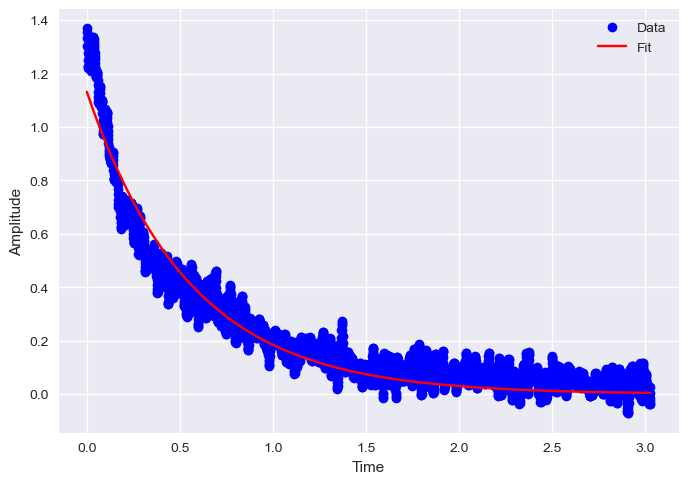

Time constant:  0.5520150567467403


In [37]:
#x1 = np.arange(0,len(signal1), 1)
x1 = t1
popt, pcov = curve_fit(func, x1, signal1)

# Extract the fitted parameters
A_fit, tau_fit = popt

# Plot the original data and the fitted curve
plt.plot(x1, signal1, 'bo', label='Data')
plt.plot(x1, func(x1, A_fit, tau_fit), 'r-', label='Fit')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Print the estimated time constant
print('Time constant: ', tau_fit)

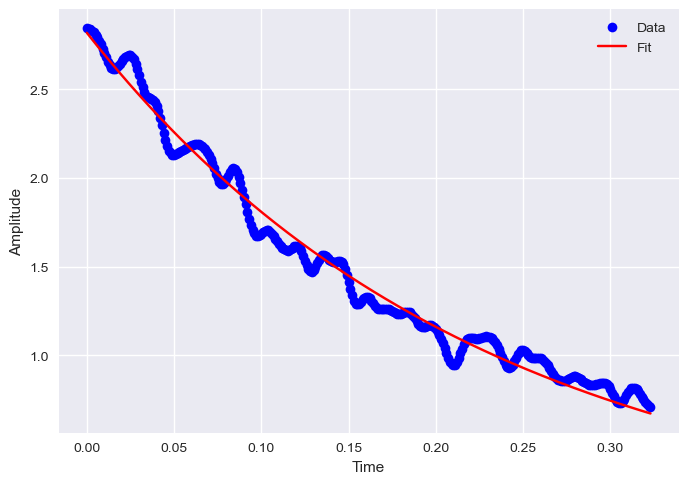

Time constant:  0.2254595399977068


In [38]:
#x2 = np.arange(0,len(signal2), 1)
x2 = t2
popt, pcov = curve_fit(func, x2, signal2)

# Extract the fitted parameters
A_fit, tau_fit = popt

# Plot the original data and the fitted curve
plt.plot(x2, signal2, 'bo', label='Data')
plt.plot(x2, func(x2, A_fit, tau_fit), 'r-', label='Fit')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Print the estimated time constant
print('Time constant: ', tau_fit)

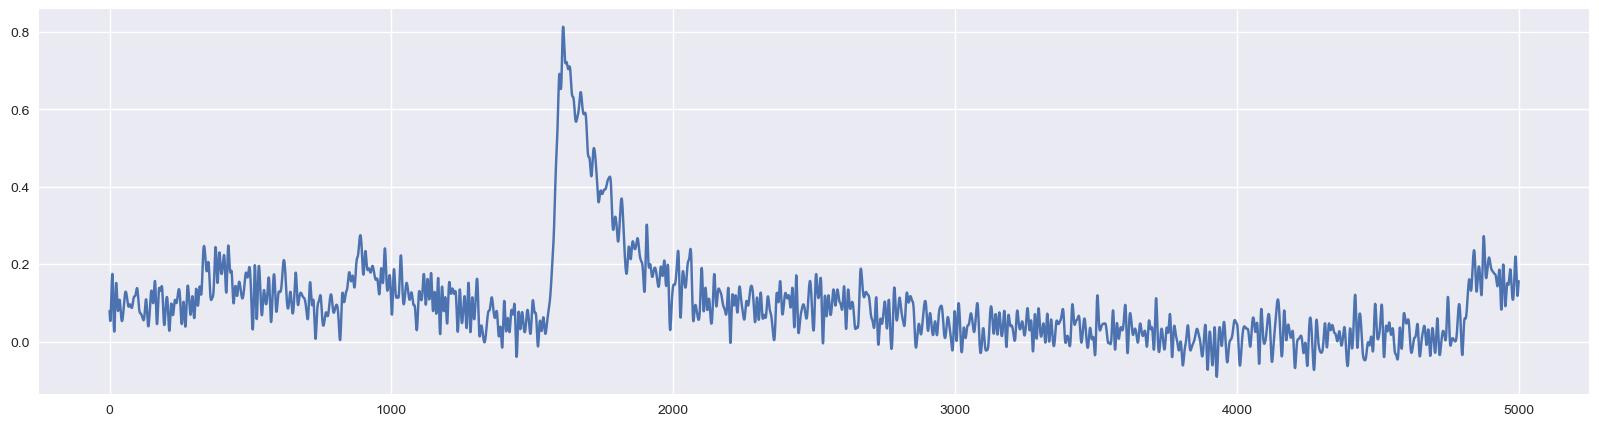

In [39]:
sig5 = sig1[15000:20000]
time5 = time1[15000:20000]
plt.figure(figsize=(20, 5))
plt.plot(sig5)

In [40]:
print(np.where(sig5 == np.max(sig5))[0])
print(np.where(sig5 == np.min(sig5))[0])

[1609]
[3928]


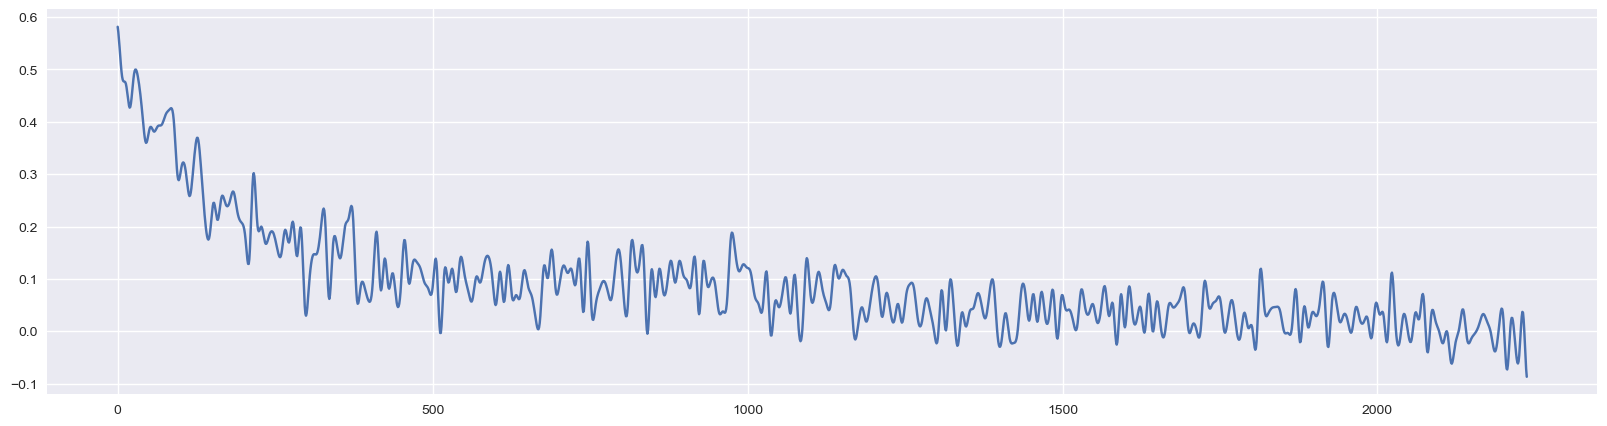

In [41]:
signal5 = sig5[1690:3928]
t5 = time5[1690:3928]
plt.figure(figsize=(20, 5))
plt.plot(signal5)

In [42]:
t5 = t5 - t5[0]

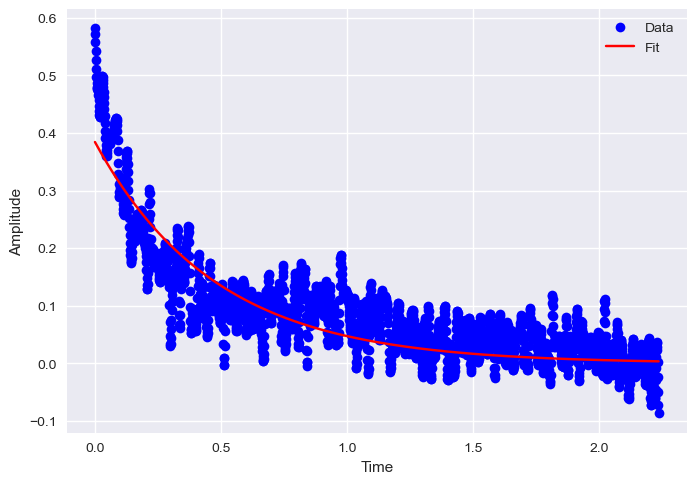

Time constant:  0.4776571698639866


In [43]:
#x5 = np.arange(0,len(signal5), 1)
x5 = t5
popt, pcov = curve_fit(func, x5, signal5)

# Extract the fitted parameters
A_fit, tau_fit = popt

# Plot the original data and the fitted curve
plt.plot(x5, signal5, 'bo', label='Data')
plt.plot(x5, func(x5, A_fit, tau_fit), 'r-', label='Fit')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Print the estimated time constant
print('Time constant: ', tau_fit)

inf

In [44]:
import scipy.signal as sig

In [51]:
sm_signal = sig.savgol_filter(upsampled_signal, window_length=100, deriv=0, delta=0.001, polyorder=3)
sm_deriv = sig.savgol_filter(upsampled_signal, window_length=100, deriv=1, delta=0.001, polyorder=3)

sm_sig = sm_signal + 0.5*sm_deriv

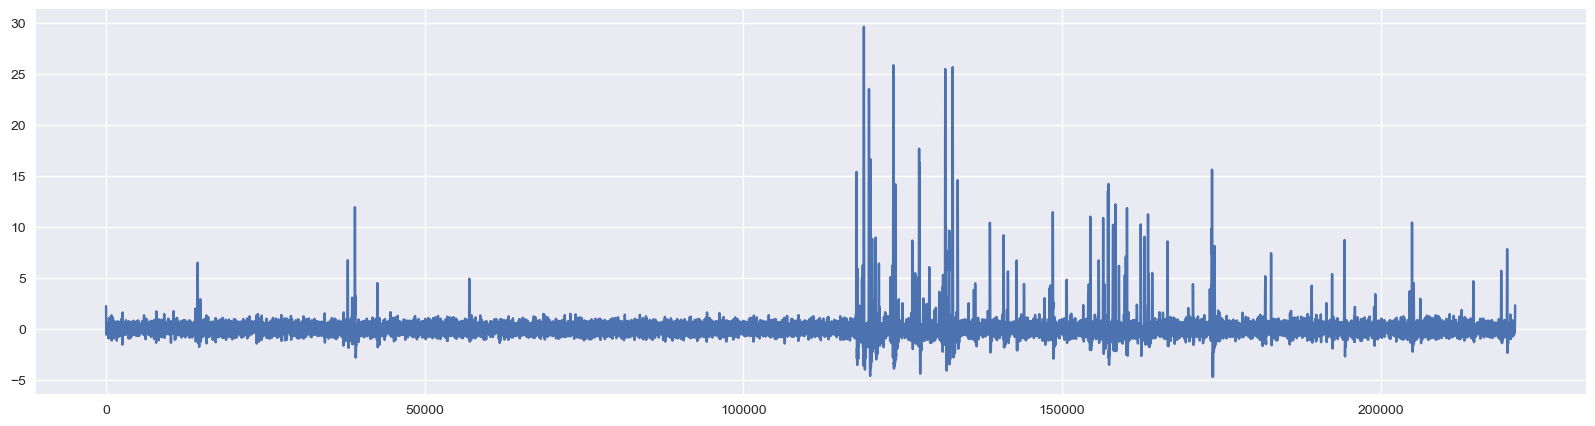

In [52]:
plt.figure(figsize=(20, 5))
plt.plot(sm_sig)